In [1]:
# Import required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sys

%load_ext autoreload
%autoreload 2

#Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#from code.arima import arima_util as arima
from code.arima import arima_util as arima
from code import tools as tl

#### Load and prepare data

In [11]:
df = tl.load_data('./data/For Naomi.csv') #read in data from file
df = tl.prepare_data(df,'消費日期','交易筆數') # select 'ds' and 'y'

In [12]:
df1 = tl.group_by_date(df, 'M','2015-01-01','2020-08-31') # group by date
df1.shape

(68, 3)

#### Split data for testing and spliting

In [13]:
df_tr, df_tst = tl.train_test_split(df1,'2018-12-31','2019-12-31')


train shape (48, 3)
test shape (12, 3)


#### Set parameters for ARIMA model

In [14]:
params = {'start_p': 1,
          'max_p': 16,
          
          'd':None,
          #'max_d':2,
          
          'start_q': 1,
          'max_q': 3,
          
          'start_P': 1,
          'max_P': 5,
    
          'D': None,
          #'max_D': 1,
    
          #'start_Q': 1,
          #'max_Q': 5,
          
          'm': 12,

          #'alpha': 0.05, # default
          'seasonal': True, 
          'stepwise': True,
          'trace':True, 
          'error_action': 'ignore',  # we don't want to know if an order does not work 
          'suppress_warnings': True  # we don't want convergence warnings 
          }

#### Model Training

In [15]:
Arima = arima.Arima_Impl(df_tr)
Arima.find_best_orders( print_summary = False, **params)
Arima.sm_train()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1076.860, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1085.102, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1074.386, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1075.752, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1083.212, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1079.448, Time=0.01 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1071.977, Time=0.09 sec
 ARIMA(1,1,0)(3,0,0)[12] intercept   : AIC=1073.928, Time=0.19 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1073.973, Time=0.14 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1074.121, Time=0.05 sec
 ARIMA(1,1,0)(3,0,1)[12] intercept   : AIC=1075.756, Time=0.55 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1076.255, Time=0.06 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=1071.457, Time=0.13 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1073.734, Time=0.04 sec
 ARIMA(2,1,0)(3,0,0

#### Predict the data and calculate MAPE

In [16]:
Arima.predict(12,'predicted_revenue')
df_pred = tl.make_dataframe(Arima.predictions.values, df_tst) #prepare data for plotting

print('MAPE: ', tl.mean_absolute_percentage_error(Arima.predictions, df_tst['y']))

MAPE:  0.059292462335839374


#### Prediction Evaluation

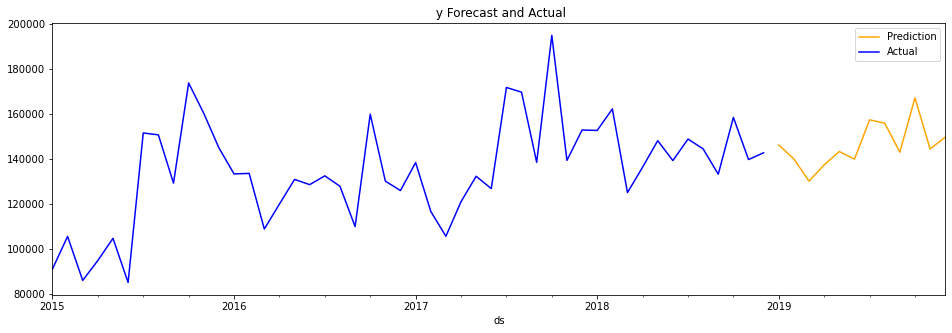

In [17]:
tl.plot_predict_and_actual(df_pred, df_tr)

(12, 2) (12, 3)


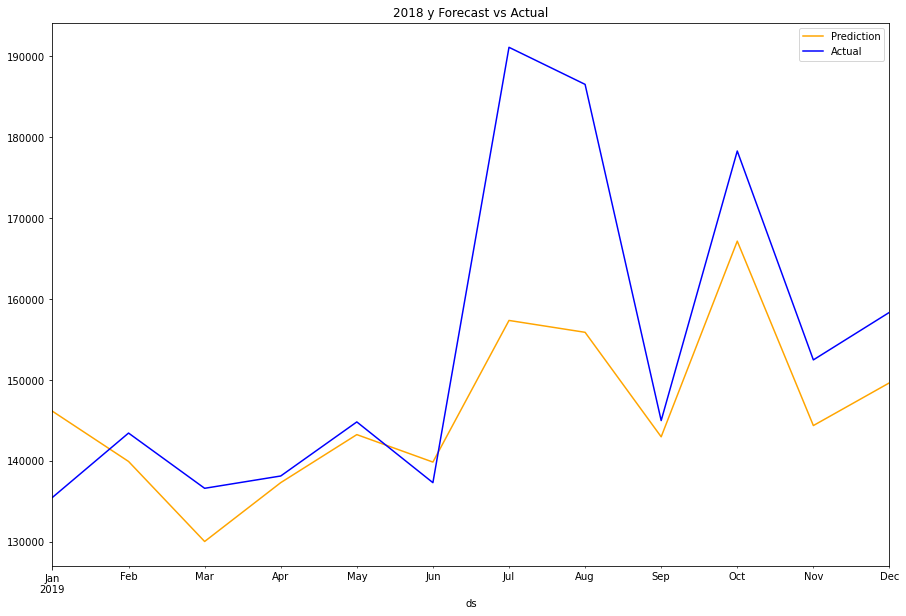

In [18]:
tl.plot_predict_vs_actual(df_pred, df_tst, 'M', '2018-12-31','2019-12-31')